### Total Bus Passengers

Combining historic and modern datasets

All Data from https://www.gov.uk/government/statistical-data-sets/bus-statistics-data-tables#historical-data-downloads

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.style.use("seaborn-colorblind")
plt.style.use("seaborn-poster")

/tmp/ipykernel_162672/2409444768.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")
/tmp/ipykernel_162672/2409444768.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


In [3]:
df_old = pd.read_excel("../Data/bus01_hist.ods", sheet_name="BUS01a_hist", header=6)
df_old = df_old.pivot_table("Passenger Journeys, millions", ["Year"], "Region")
df_old.head()

Region,East Midlands,East of England,England,England outside London,English metropolitan areas,English non-metropolitan areas,Great Britain,London,North East,North West,Scotland,South East,South West,Wales,West Midlands,Yorkshire and the Humber
Year,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,6497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN,NaN,6781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN,NaN,6700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN,NaN,6411.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,NaN,6108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_new = pd.read_excel("../Data/bus01.ods", sheet_name="BUS01a", header=7, index_col="Year")
df_new.head()

,North East,North West,Yorkshire and the Humber,East Midlands,West Midlands,East of England,London,South East,South West,English metropolitan areas,English non-metropolitan areas,Other predominantly urban areas [note 2],Urban with Significant Rural,Largely or Mainly Rural,England,Scotland,Wales,Great Britain,England outside London,Revised
Year,,,,,,,,,,,,,,,,,,,,
2004/05,206.023867,439.615560,350.054424,200.389475,407.010339,167.260558,1802.411000,283.108022,170.410598,1047.336168,1176.536676,560.101920,362.473799,253.960957,4026.283844,459.268174,122.954978,4608.506996,2223.872844,[z]
2005/06,202.019781,442.471253,356.432853,201.561724,402.916574,167.795690,1881.090000,288.758128,170.880611,1048.993640,1183.842975,567.750150,361.397505,254.695320,4113.926614,465.391120,120.097545,4699.415278,2232.836614,[z]
2006/07,206.314554,448.355772,360.841696,201.701552,406.664431,183.280820,1993.362000,309.729521,187.645695,1051.511781,1253.022260,594.998852,383.569173,274.454236,4297.896040,475.872199,118.785659,4892.553898,2304.534040,[z]
2007/08,203.945236,467.613244,367.669313,214.597724,411.555815,189.139179,2160.371937,319.335287,196.001409,1067.242287,1302.614920,615.258921,406.405817,280.950182,4530.229144,487.271882,125.287754,5142.788779,2369.857207,[z]
2008/09,209.164153,467.329022,375.270963,215.561099,414.278569,193.773221,2228.201369,327.946742,204.928584,1074.221583,1334.030769,635.444062,410.405483,288.181224,4636.453721,483.627599,129.829117,5249.910438,2408.252352,"[r] Yorkshire and the Humber, England, Great B..."


In [5]:
df = pd.concat([df_old, df_new])
# Remove duplicate years from index
df = df[~df.index.duplicated(keep="last")]
df.head()

,East Midlands,East of England,England,England outside London,English metropolitan areas,English non-metropolitan areas,Great Britain,London,North East,North West,Scotland,South East,South West,Wales,West Midlands,Yorkshire and the Humber,Other predominantly urban areas [note 2],Urban with Significant Rural,Largely or Mainly Rural,Revised
Year,,,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,6497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,NaN,NaN,NaN,NaN,NaN,NaN,6781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN,NaN,6700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,NaN,NaN,NaN,6411.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,NaN,6108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Year', ylabel='Passenger journeys, million'>

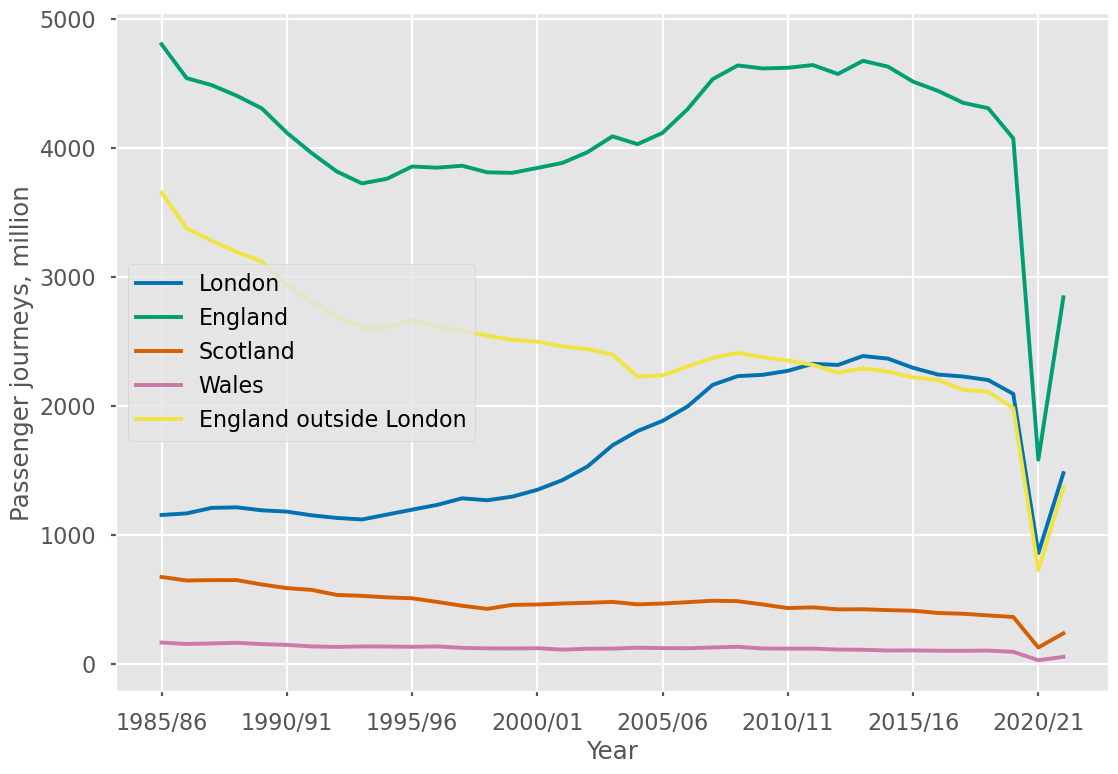

In [7]:
df[df.index.str.contains("/")][["London", "England", "Scotland", "Wales", "England outside London"]].plot(ylabel="Passenger journeys, million")